In [ ]:
from datetime import datetime
from pathlib import Path
import importlib
import time
import win32com.client
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")  # Oculta todos los warnings

# Mis modulos
import download_mail_file as dmf
import file_management as fm
import graphic_settings as gs
import send_reports_through_wssp as srtw

### Banner

In [144]:
# import pyfiglet
# print(pyfiglet.figlet_format("Ralenti WSSP"))

banner = r"""
 ____       _            _   _  __        ______ ____  ____  
|  _ \ __ _| | ___ _ __ | |_(_) \ \      / / ___/ ___||  _ \ 
| |_) / _` | |/ _ \ '_ \| __| |  \ \ /\ / /\___ \___ \| |_) |
|  _ < (_| | |  __/ | | | |_| |   \ V  V /  ___) |__) |  __/ 
|_| \_\__,_|_|\___|_| |_|\__|_|    \_/\_/  |____/____/|_|                                                               

    💥 AUTOMATIZADOR DE ENVIO DE REPORTES POR WSSP 💥
"""

print(banner, end='\n\n')
time.sleep(1)


 ____       _            _   _  __        ______ ____  ____  
|  _ \ __ _| | ___ _ __ | |_(_) \ \      / / ___/ ___||  _ \ 
| |_) / _` | |/ _ \ '_ \| __| |  \ \ /\ / /\___ \___ \| |_) |
|  _ < (_| | |  __/ | | | |_| |   \ V  V /  ___) |__) |  __/ 
|_| \_\__,_|_|\___|_| |_|\__|_|    \_/\_/  |____/____/|_|                                                               

    💥 AUTOMATIZADOR DE ENVIO DE REPORTES POR WSSP 💥




### Configuracion

In [145]:
# Constantes usadas en el notebook
MAPI = "MAPI" # Messaging Application Programming Interface
DOT = "."
OUTLOOK = "Outlook"
APPLICATION = "Application"

# Diccionarios
outlook_folder_codes = {
    0: 'Calendario',
    1: 'Contactos',
    2: 'Borradores',
    3: 'Diario / Jornal',
    4: 'Notas',
    5: 'Tareas',
    6: 'Bandeja de entrada',
    7: 'Bandeja de salida',
    8: 'Elementos enviados',
    9: 'Elementos eliminados',
    10: 'Bandeja de correo del servidor',
    11: 'Conflictos',
    12: 'Elementos de sincronizacion local',
    13: 'Elementos de sincronizacion (Envio)',
    14: 'Elementos de sincronización (Recibo)',
    15: 'Elementos de sincronización completa',
    16: 'Diario de formularios',
    17: 'Carpeta de búsqueda',
    18: 'Bandeja para reglas cliente',
    19: 'Carpeta de sugerencias de correo',
}
outlook_object_types = {
    "AppointmentItem": 26,
    "MailItem": 43,
    "TaskItem": 46,
    "ContactItem": 48,
    "MeetingItem": 53,
}
parse_locaciones = {
    '06 AYA EL PEDREGAL': 'Pedregal',
    '38 AYA ATICO': 'Atico',
    '40 AYA CHALA': 'Chala',
    '88 AYA CAMANA': 'Camana'
}
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
    11: 'Noviembre', 12: 'Diciembre'
}
conductores_ralenti = {
    "name": "Conductores ralenti",
    "mail_subject": "Reporte programado en la base de datos lindley_peru: ACL T2 - Resumen Operativo de Flota (Por Conductor) - AYA",   # Nombre del asunto de correo
    "mail_file_address": "",                                                                                                            # Direccion del archivo del correo
    "mail_sheet_name": "Summary",
    "mail_received_time": "",
    "relevant_columns": [
        'LOCACION',
        'CONDUCTOR',
        'RECORRIDO.',
        'TIEMPO RALENTI.',
    ],
    "reports": [ # sobre 'TIEMPO RALENTI.'
        'CONDUCTOR',
    ]
}

# Listas
locaciones = ['PEDREGAL', 'CHALA', 'CAMANA']
PEDREGAL = 'PEDREGAL'
CAMANA = 'CAMANA'
CHALA = 'CHALA'

# Constantes
root_address = r'C:\Informacion\rechazos'
project_address = r"C:\Informacion\ralenti\Automatizacion\automatizacion_reporte_ralenti_wssp"

### Obtener correos de Outlook

Configuracion de uso de Outlook

In [ ]:
# Conectar a Outlook
#outlook_folder_codes = int(input(f'{" ".join(["(" + str(key) + ": " + value + ")" for key, value in outlook_folder_codes.items()])}'))
outlook = win32com.client.Dispatch(OUTLOOK+DOT+APPLICATION).GetNamespace(MAPI)

outlook_folder = outlook.GetDefaultFolder(6)
print(f'Tipo de folder: {outlook_folder}')

Tipo de folder:  Bandeja de entrada


Guardar archivo de outlook

In [ ]:
importlib.reload(dmf)

# Buscar el correo más reciente con archivo Excel
mails = outlook_folder.Items

# Ordenar por fecha descendente
mails.Sort("[ReceivedTime]", True) # (mails) Es un objeto lista

''' MAIL PROPERTIES
    | (mail.Subject) (mail.ReceivedTime) (mail.SenderName)       |
    | (mail.SenderEmailAddress) (mail.To) (mail.CC)              |
    | (mail.Body) (mail.Attachments.Count) (mail.CreationTime)   |
    | (mail.LastModificationTime) (mail.EntryID)                 |
'''

(   
    df,
    conductores_ralenti['mail_file_address'], 
    conductores_ralenti['mail_received_time'], 
) = dmf.download_mail_file(
    mails, 
    outlook_object_types['MailItem'],
    project_address,
    conductores_ralenti
)

print(f'Fecha: {conductores_ralenti['mail_received_time']}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   LOCACION            4 non-null      object
 1   OPERADOR LOGISTICO  4 non-null      object
 2   CONDUCTOR           28 non-null     object
 3   RECORRIDO.          28 non-null     object
 4   Km/Hr               28 non-null     object
 5   TIEMPO MOTOR ON     28 non-null     object
 6   TIEMPO CONDUCCION.  28 non-null     object
 7   %. CONDUCCION       22 non-null     object
 8   TIEMPO RALENTI.     28 non-null     object
 9   %. RALENTI          22 non-null     object
 10  Conductor           10 non-null     object
 11  LOCACION            10 non-null     object
 12  Total               10 non-null     object
dtypes: object(13)
memory usage: 3.0+ KB
None


In [148]:
importlib.reload(fm)

df = fm.file_processing(
        df,
        conductores_ralenti,
        PEDREGAL
    )

print(df.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 10 to 21
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   LOCACION         12 non-null     object         
 1   CONDUCTOR        12 non-null     object         
 2   RECORRIDO.       12 non-null     float64        
 3   TIEMPO RALENTI.  12 non-null     timedelta64[ns]
dtypes: float64(1), object(2), timedelta64[ns](1)
memory usage: 480.0+ bytes
None



In [149]:
for key, value in conductores_ralenti.items():
    print(f'{key}: {value}')

name: Conductores ralenti
mail_subject: Reporte programado en la base de datos lindley_peru: ACL T2 - Resumen Operativo de Flota (Por Conductor) - AYA
mail_file_address: C:\Informacion\ralenti\Automatizacion\automatizacion_reporte_ralenti_wssp\ACL T2 - Resumen Operativo de Flota (Por Conductor) - AYA_20250617_020334.xlsx
mail_sheet_name: Summary
mail_received_time: 16-06-2025
relevant_columns: ['LOCACION', 'CONDUCTOR', 'RECORRIDO.', 'TIEMPO RALENTI.']
reports: ['CONDUCTOR']


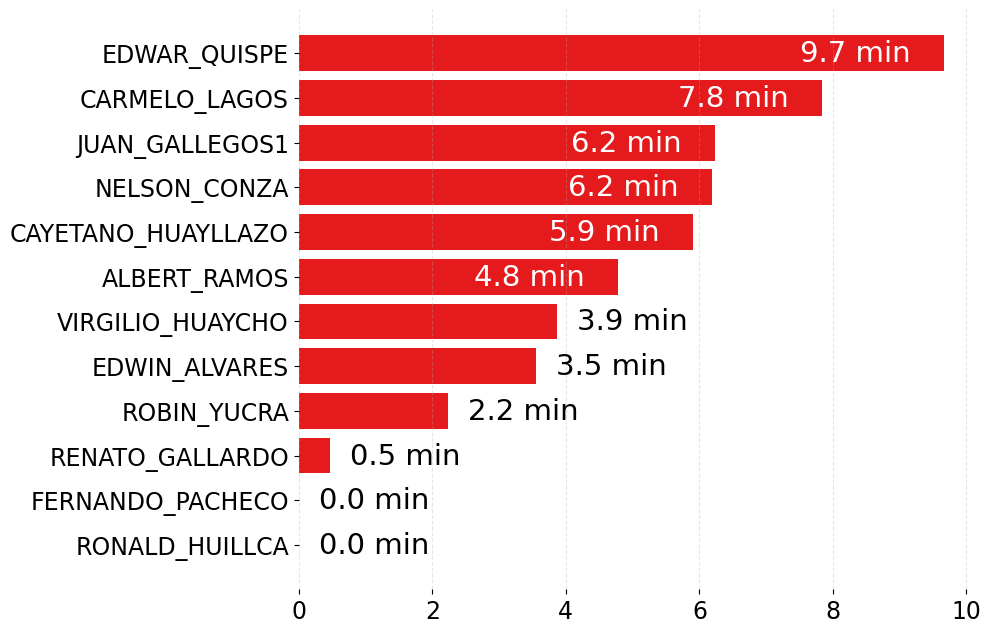

In [150]:
importlib.reload(gs)

gs.main(project_address, df, conductores_ralenti)

### Envio de Reporte

In [152]:
importlib.reload(srtw)

# Envio de reportes a grupo de wssp
def send_reports(group_option):
    WSSP_CONFIF = {
        'page_url': 'https://web.whatsapp.com',
        'group_names': ['PEDREGAL - DISTRIBUCIÓN'] if group_option == 1 else ['GrupoPrueba - ón'],
    }

    srtw.main(project_address, WSSP_CONFIF, conductores_ralenti['mail_received_time'])

# 🔁 Bucle de confirmación
while True:
    print("\nSelecciona grupo de wssp:")
    print("  [1] Grupo Oficial")
    print("  [2] Grupo de Prueba")
    print("  [3] Terminar proceso")

    group_option = int(input(">> Opción (1 - 3): "))

    if group_option == 3 or group_option > 2:
        print("\n[✓] Proceso finalizado.")
        break  # salir del bucle
    else:        
        send_reports(group_option)


Selecciona grupo de wssp:
  [1] Grupo Oficial
  [2] Grupo de Prueba
  [3] Terminar proceso

.-----------------------------------------------------------------------.
[*] Abriendo Grupo de WSSP (GrupoPrueba - ón)
[*] Esperando a que cargue la página
[*] Pagina cargada (15 seg de renderizado) ...

[✓] Click realizado en el grupo: 'GrupoPrueba - ón'

[✓] Click realizado en el boton de 'Adjuntar'
[*] Cargando imagen  (ralenti.png) ...
[*] Escribiendo mensaje ...

✅ Reportes enviados correctamente
'-----------------------------------------------------------------------'


Selecciona grupo de wssp:
  [1] Grupo Oficial
  [2] Grupo de Prueba
  [3] Terminar proceso

.-----------------------------------------------------------------------.
[*] Abriendo Grupo de WSSP (PEDREGAL - DISTRIBUCIÓN)
[*] Esperando a que cargue la página
[*] Pagina cargada (15 seg de renderizado) ...

[✓] Click realizado en el grupo: 'PEDREGAL - DISTRIBUCIÓN'

[✓] Click realizado en el boton de 'Adjuntar'
[*] Cargando im

### Limpiar carpeta

In [153]:
carpeta = Path(project_address)
#print(list(carpeta.glob('*.png')))

# Eliminar archivos .png
for imagen in carpeta.glob('*.png'):
    imagen.unlink()  # .unlink() elimina el archivo
    print(f'Eliminando: {imagen}')

# Eliminar archivos .xlsx
for imagen in carpeta.glob('*.xlsx'):
    imagen.unlink()  # .unlink() elimina el archivo
    print(f'Eliminando: {imagen}')

Eliminando: C:\Informacion\ralenti\Automatizacion\automatizacion_reporte_ralenti_wssp\ralenti.png
Eliminando: C:\Informacion\ralenti\Automatizacion\automatizacion_reporte_ralenti_wssp\ACL T2 - Resumen Operativo de Flota (Por Conductor) - AYA_20250615_020428.xlsx
Eliminando: C:\Informacion\ralenti\Automatizacion\automatizacion_reporte_ralenti_wssp\ACL T2 - Resumen Operativo de Flota (Por Conductor) - AYA_20250617_020334.xlsx


### Export it as .py

In [158]:
import nbformat
from nbconvert import PythonExporter

# Cargar el notebook
notebook_path = "main.ipynb"
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Eliminar la última celda
nb['cells'] = nb['cells'][:-1]

# Convertir a script .py
exporter = PythonExporter()
codigo_python, _ = exporter.from_notebook_node(nb)

# Guardar el archivo .py
with open("main.py", "w", encoding="utf-8") as f:
    f.write(codigo_python)

print("✅ Archivo .py creado sin la última celda.")

✅ Archivo .py creado sin la última celda.
